# Imports

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

from os import path

from torch.utils.data import TensorDataset

from utils.plot import plot_digit_histograms


In [2]:
## Setting torch seed

random_seed = 1
torch.manual_seed(random_seed)

# Import fine tunning data

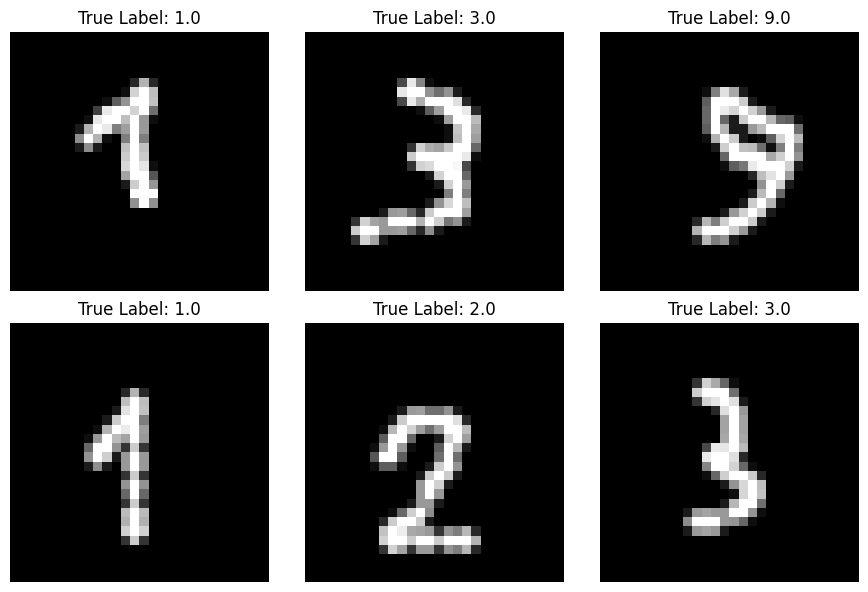

In [3]:
PATH = "fine_tune_data.csv"

line_data = np.genfromtxt(PATH, delimiter=',')


true_labels = [d[0] for d in line_data]
# Reshape, normalize in one line
data = [(np.array(d[1:], dtype=np.float32) / 255.0).reshape((28,28)) for d in line_data]


fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    ax.imshow(data[i], cmap='gray', vmin=0, vmax=1)
    ax.set_title(f"True Label: {true_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.savefig("six_images_subplots.png")

# Dara Preparation

## Splitting and shuffling data

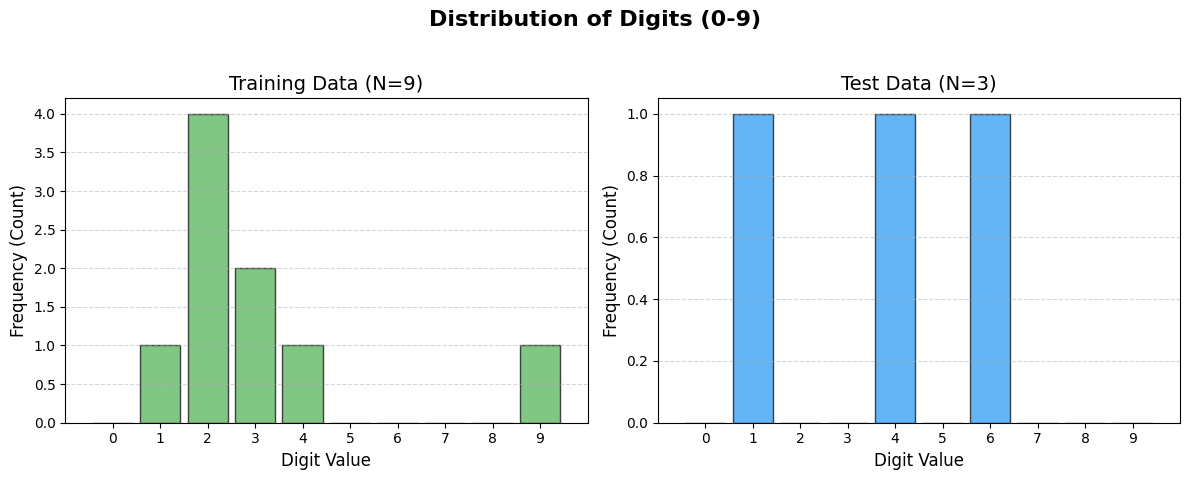

[6. 1. 4.]


In [6]:
np.random.seed(42)

N = len(data)
idx = np.arange(N)
np.random.shuffle(idx)

data = np.array(data)
true_labels = np.array(true_labels)

train_idx = idx[:int(N*0.8)]
test_idx = idx[int(N*0.8):]

x_train, y_train = data[train_idx], true_labels[train_idx]
x_test, y_test = data[test_idx], true_labels[test_idx]

plot_digit_histograms(y_train, y_test)

print(y_test)

## Preferring data for torch

In [9]:
# Move Data to tensors
x_train_tensor, y_train_tensor = torch.from_numpy(x_train), torch.from_numpy(y_train)
x_test_tensor, y_test_tensor =  torch.from_numpy(x_test), torch.from_numpy(y_test)

# Prepare Dataset
train_set = TensorDataset(x_train_tensor, y_train_tensor)
test_set = TensorDataset(x_test_tensor, y_test_tensor)

# Data loaders
train_batch_size = 16
test_batch_size = len(test_set)

if len(test_set) < train_batch_size:
    print("Not enough data for training")


train_loader = torch.utils.data.DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, shuffle=True)

Not enough data for training


# Loading Model

In [ ]:
from Model import MyModel

PARAMS_PATH = path.join("trained_models", "model.pth")
model = MyModel()
model.load_state_dict(torch.load(PARAMS_PATH))

model